In [7]:
import networkx as nx
import itertools as it
import random
import math

## Algorithm Design 2019-20 @ Computer Science - Università di Pisa
# Randomized Approximation and Derandomization
### Scribe: Filippo Lari.  Lecturer: Roberto Grossi.

## Approximation algorithms

Many optimization problems of practical interest fall into the class of NP-Hard problems, threfore algorithms which output the optimal solution in polynomial time in the size of the inputs are not yet known. One possible method of approaching such problems is through the use of so-called approximation algorithms, which are guaranteed to compute a feasible solution close to the optimal one within a factor $r>1$. Formally if we denote with $OPT$ the optimal value for the considered problem and with $COST(S)$ the value of a give solution $S$, an approximation algorithm provide an r-approximation if for every problem's instance the following inequality hold:

\begin{equation}
\quad \quad max\{\frac{COST(S)}{OPT},\, \frac{OPT}{COST(S)}\}\, \leq\, r
\end{equation}

## Randomized approximation algorithms

As we saw during the course, randomization is a powerfull tool that can help us design very efficient algorithms. Even in the domain of approximation algorithm we can use randomness to obtain an r-approximation for a give problem. In this case we have to ensure that on average the value of the computed solution is close to the optimal one within a factor $r>1$. In other words, if we denote with $COST(S)$ the expected value of our solution the inequality (1) hold.

In this Lecture, using the **MAX-CUT** problem as a case study, we will design a randomized 2-approximation algorithm and we will also see two different methods that allow us to remove randomness from that algorithm, obtaining a deterministic one. First of all let's introduce our case study problem:

## MAX-CUT problem

Let $G\, =\, (V,\, E)\,$ be an unweighted graph, where $V$ is the set of nodes and $E$ is the set of edges. A cut for $G$ is a partition of $V$ into two disjoint subsets $S$ and $\bar S$ such that $S\, \subseteq\, V\,$ and $\bar S\, =\, V\, \setminus\, S$.

Given a cut $(S,\, \bar S)\,$ we are interested in those edges that cross it, that is, the set of edges having an endpoint in $S$ and the other one in $\bar S$. This set is called *cut-set* and we will denoted it as:

\begin{equation}
E(S,\, \bar S)\, =\, \{\{u,v\}\, \in\, E\, |\, u\, \in S,\, v\, \in\, \bar S\}
\end{equation}

While the cardinality of the aforementioned set is called *cut-size*, and we will simply denote it as $|E(S,\, \bar{S})|$.

**Example**: Let's consider the following graph:

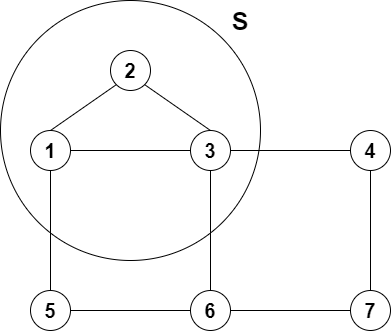

We have $S\, =\, \{1,\, 2,\, 3\}$ threfore $\bar{S}\, =\, \{4,\, 5,\, 6,\, 7\}$, our *cut-set* is $E(S,\, \bar S)\, =\, \{(1,5),\, (3,6),\, (3,4)\}$ and its size is 3.

The **MAX-CUT** problem, in its non-decisional formulation, asks to determine a cut $(S,\, \bar S)$ for a given unweighted graph $G$ such that $|E(S,\, \bar S)|$ is maximum. Since it has been proven to be *NP-Hard*, the design of a *good* approximation algorithm (randomized or not) for this problem is of great interest.

## Randomized 2-approximation algorithm

We have seen two deterministic approaches to obtain a polynomial time 2-approximation algorithm for **MAX-CUT** in the previous lectures, one is based on a local search and the other one on a greedy strategy. It's also possible to design a randomized one by observing that a cut is fully determined by which nodes belong to $S$, so the basic idea is to toss a fair coin (i.e $P(Coin\, =\, Head)\, =\, P(Coin\, =\, Cross)\, =\, \frac{1}{2}$) for every node in $V$, then assign it to $S$ if the outcome is head and to $\bar S$ otherwise (or vice versa it doesn't matter).

It's easy to see that an algorithm based on this strategy always returns a feasible solution to the problem, but we are interested in the quality of such solution. Following the previous definition, to have a randomized 2-approximation algorithm, we have to show that the expected value of a computed cut is at most half the value of the optimal one.

*Proof*:

Consider an edge $\{i,\, j\}\, \in\, E$, the probability that this edge belong to the *cut-set* is:

\begin{equation}
P(\{i,\, j\}\, \in\, E(S,\, \bar S))\, =\, P(\{i\, \in S,\, j\, \in\, \bar S\}\ \cup\ \{i\, \in \bar S,\, j\, \in\, S\})\, =\, \frac{1}{4}\, + \frac{1}{4}\, =\, \frac{1}{2}
\end{equation}

Since each node is inserted in one of the two sets independently from the others, and the events in the union are mutually exclusive.

**Observation:** assigning a node to $S$ or $\bar S$ with any other probability $0 < p < 1$ different from $\frac{1}{2}$, we don't get an higher probability to have a given edge $\{i,\, j\}$ in the *cut-set* as that probability would be the following:

\begin{equation}
P((i,\, j)\, \in\, E(S,\, \bar S))\, =\, p\,(1-p)\, +\, p\,(1-p)\, =\, 2p\,(1-p)
\end{equation}

which is maximum only for $p\, =\, \frac{1}{2}\,$.

Now for every edge $\{i,\, j\}\, \in\, E$ we define a random indicator variable for the event $\{i,\, j\}\, \in\, E(S,\, \bar S)$:

\begin{equation}
X_{i,j}\, =\,
\begin{cases}
1 & \text{If}\, \{i,\, j\}\, \in\, E(S,\, \bar S)\\
0 & \text{Otherwise}
\end{cases}
\end{equation}

We can now express the value of the *cut-size* computed by our algorithm $|E(S,\, \bar S)|$ as $\sum\limits_{\substack{(i,j) \in E \\ i<j}} X_{i,j}$ which allows us to easily compute its expected value:

\begin{align*}
 \mathbb{E}[|E(S,\, \bar S)|] &= \mathbb{E}[\sum\limits_{\substack{(i,j) \in E \\ i<j}} X_{i,j}]\\
 & \text{by linearity of the expected value} \\
 & = \sum\limits_{\substack{(i,j) \in E \\ i<j}} \mathbb{E}[X_{i,j}] \\
 & \text{by the definition of expected value of random indicator variables} \\
 & = \sum\limits_{\substack{(i,j) \in E \\ i<j}} \frac{1}{2} \\
 & \text{we are summing up over all the edges in $E$} \\
 & = \frac{|E|}{2}
\end{align*}

Now we don't know the optimal value $OPT$ for every instance of the problem, but we can use the quantity $|E|$ as an upper bound for it, as the size of each *cut-set* can't be larger than the total number of edges in the graph:

\begin{equation}
\frac{UB}{COST(S)}\, =\, \frac{2\, |E|}{|E|}\, =\, 2 
\end{equation}

Which, by transitivity, implies the following:

\begin{equation}
\frac{OPT}{COST(S)}\, \leq\, 2 
\end{equation}

$\square$

In conclusion this proves that the quality of a solution computed by such an algorithm is, on average, at least half the value of the optimal one. Therefore is a randomized 2-approximation for the **MAX-CUT** problem and it also has $\mathcal{O}(n\, +\, poly(n))$ running time, where the $poly(n)$ term is needed for computing the *cut-size*.

## Derandomization

Derandomization deals with removing dependencies on random choices in order to obtain a deterministic algorithm from a non deterministic one. A very simple, but inefficient way to do that is by enumerating all the possible solutions that a non deterministic algorithm can came up with, and then return the better one. Regarding the **MAX-CUT** problem and its randomized 2-approximation that we have developed before, we can build a deterministic algorithm from it simply by generating the power set of $|V|$, in other words enumerating all the possible cuts of the input graph. For each of them we proceed by computing their size and finally returning the cut with the maximal size.

Using this *brute force* technique we obtain an algorithm that exactly solves **MAX-CUT** and its running time is $\mathcal{O}(2^{n}\, poly(n))$, where the $poly(n)$ factor is needed for computing the size of a given cut.

Enumerationg all the possible random choices is not the most resource aware method to derandomize an algorithm, therefore we will see other two techniques that leads to more efficent algorithms, one based on *universal hash functions* and the other one on *conditional expectation*.

## Derandomization via universal hash functions

We can observe that our randomized 2-approximation basically choose one solution at random among exponentially many. The idea of this method is to develop a randomized algorithm that chooses among polynomially many solutions, where each of them on average have at least half the value of the optimal one. Then we can just enumerate all of them and select the maximal one. In this way we will only pay polynomial time. Before introducing this method, we briefly recall the definition of universal hash functions given in one of the first lectures:

**Definition**(1): Let $\mathscr{H}$ be a family of hash functions that map a universe of key $U$ in the interval \{0,1,..,$m-1$\}. Such a collection is called **universal** if for every distinct key $k,\, l\, \in\, U$ the number of hash functions $h\, \in\, \mathscr{H}$ such that $h(k)\, =\, h(l)$ is at most $\frac{|\mathscr{H}|}{m}$.

From definition (1) follows that randomly selecting an hash function $h\, \in\, \mathscr{H}$ the probaility that two different keys collide is at most $\frac{1}{m}$. Now let $p$ be a prime number, large enough such that every possible key $k$ is in the intervall that goes from $0$ to $p-1$. If we denote with $\mathbb{Z}_{p}\,$ the set $\{0,1,\dots,p-1\}$ and with $\mathbb{Z}_{p}^{*}$ the set $\{1,2,\dots,p-1\}$. Given $a\, \in\, \mathbb{Z}_{p}^{*}\, \text{and}\, b\, \in\, \mathbb{Z}_{p}$ we define the following hash function:

\begin{equation}
h_{ab}(k)\, =\, ((ak\,+\,b)\, \text{mod}\, p)\, \text{mod}\, m
\end{equation}

**Theorem**: The hash functions family $\mathscr{H}_{pm}\, =\, \{ h_{ab}\, :\, a\, \in\, \mathbb{Z}_{p}^{*}\, \text{and}\, b\, \in\, \mathbb{Z}_{p} \}$ is universal.

Now w.l.o.g we can assume to have all the nodes numbered from 0 up to $|V|-1$ (the ordering doesn't matter). Consider the above hash functions family $\mathscr{H}$ where $U\, =\, \{0,\dots,|V|-1\}$ and $m\, =\, 2\,$. Let $k$ be the closest power of 2 such that $2^{k-1}\, <\, n\, <\, 2^{k}$, we choose the prime number $p$ greater than $2^{k}$, but close to it within a constant factor. We can now use an hash function $h\, \in\, \mathscr{H}$ to build a cut in this way, for every node $u\, \in\, V$ if $h(u)\, =\, 1$ then $u$ belongs to $S$, otherwise it belongs to $\bar{S}$.

**Theorem** Building a cut according to the above strategy makes the probability for a given edge $(i,j)\, \in\, E$ to be in $E(S,\, \bar S)\,$ at least $\frac{1}{2}$.

*Proof:*
$P((i,\, j)\, \in\, E(S,\, \bar S))\, =\, P(h(i)\, \neq\, h(j))\, =\, 1\, -\, P(h(i)\, =\, h(j))\, \geq\, \frac{1}{2}\, \square $

**Theorem** The number of possible choices of $h\, \in\, \mathscr{H}$ is $\mathcal{O}(n^2)$.

*Proof:*
By the definition of $\mathscr{H}$, choosing a function from it is equivalent to choose $a\, \in\, \mathbb{Z}_{p}^{*}\, \text{and}\, b\, \in\, \mathbb{Z}_{p}\,$. All the possible choices of $a\,$ and $b$ are $p\, (p-1)$, by construction we have chosen $p$ to be $\theta(2^k)$ and $n\, \leq\, 2^k$. Therefore they are $\mathcal{O}((2^{k})^2)\, =\, \mathcal{O}(n^2) \square$.

By this last consideration we can still use our *brute force* approach to derandomization by going throw all the possible hash functions $h\, \in\, \mathscr{H}$, determine a cut, compute its size and finally return the maximal one. In this way we obtain a polynomial time algorithm, but we still have to show that its a 2-approximation for **MAX-CUT**.

**Theorem** Let $h\, \in\, \mathscr{H}$ a cut determined by $h$ as an expected size greater or equal to $|E|/2$.

*Proof:*

Let $X_{i,j}$ be a random indicator variable for the event $(i,j)\, \in\, E(S,\, \bar S)$.

Theorem(?) implies that $P(X_{i,j}\, =\, 1)\, \geq\, \frac{1}{2}$.

Let $Y\, =\, \sum\limits_{\substack{(i,j) \in E \\ i<j}} X_{i,j}\, =\, |E(S,\, \bar S)|$.

We can now compute the expected value of $Y$ in this way:

$\mathbb{E}[Y]\, =\, \mathbb{E}[\sum\limits_{\substack{(i,j) \in E \\ i<j}} X_{i,j}]\, =\, \sum\limits_{\substack{(i,j) \in E \\ i<j}} \mathbb{E}[X_{i,j}]\, \geq\, \sum\limits_{\substack{(i,j) \in E \\ i<j}} \frac{1}{2}\, =\, \frac{|E|}{2} \square$

Finally, Theorem(x) ensures that going throw all the possible cuts given by the functions in $\mathscr{H}$ require polynomial time. Theorem(y) guarantees that the expected size of our cuts are at least half of the upper bound $|E|$. Now we can observe that at least one of the examined cuts will have a size greater or equal to $|E|/2$. In conclusion the derandomized algorihm that we have obtained is a polynomial time 2-approximation for **MAX-CUT**.

We can now compare the two algorithms, aside from the main difference between a randomized algorithm and a deterministic one, we can observe that the algorithm we have derived is "slower" in therm of running time, but it shows an high level of parallelism. The choice of putting a node in $S$ or not, is independent from what we have done with other nodes. Therefore this operation could be done in parallel. Furthermore the construction of a cut with a given $h$ is independent from the construction of all the other cuts, therefore also this operation could be done in parallel.

## Derandomization via conditional expectation

Another method to derandomize an algorithm is via the use of *conditional
expectance*. Suppose nodes $v_{1},v_{2},\dots,v_{i}$ are already placed in $S$ and $\bar{S}$ in a deterministic way. Let us analyze the expected size of the cut if we were allowed to make random choices from now on, and focus on the choice of $v_{i+1}\,$:

\begin{align*}
 \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}] & = \frac{1}{2}\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, S]\\
 & + \frac{1}{2}\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, \bar{S}] \\
\end{align*}

At least one of the two choices will not decrease the *cut-size*, therefore at least one of the following inequalities is true:

\begin{equation}
\mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, S]\, \geq\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}]
\end{equation}

\begin{equation}
\mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}\, \text{and}\, v_{i+1}\, \in\, \bar{S}]\, \geq\, \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed}]
\end{equation}

Now assume that we know how to compute the expected cut-size efficiently in both cases ($v_{i+1}\, \in\, S\, \text{and}\, v_{i+1}\, \in\, \bar{S}$). We have already saw that making a random choice for every node guarantees that the resulting cut has an expected size of $|E|/2$. Now, starting from the beginning, we put a node in $S$ or $\bar{S}$ in such a way that the expected cut-size increases. Using this strategy, we have the following chain of inequalities.

\begin{align*}
 \frac{|E|}{2}\, & \leq\, \mathbb{E}[ \text{cut-size} |\, v_1\, \text{is placed according to the above strategy}]\\
 & \leq\, \mathbb{E}[\text{cut-size} |\, v_{1},v_{2}\, \text{are placed according to the above strategy}]\\
 & \leq\, \dots \\
 & \leq\, \mathbb{E}[\text{cut-size} |\, v_{1},v_{2},\dots,v_{n}\, \text{are placed according to the above strategy}]
\end{align*}

Therefore, the expected value of our solutions will be at least $|E|/2$. However to incorporate this nodes selection strategy into an algorithm, we need a way to find out which expectation is bigger. Consider the situation where nodes $v_{1},v_{2},\dots,v_{i}$ are somehow placed in $S$ or $\bar{S}$, and we are making the choice for $v_{i+1}$. Graphically we have the following scenario:

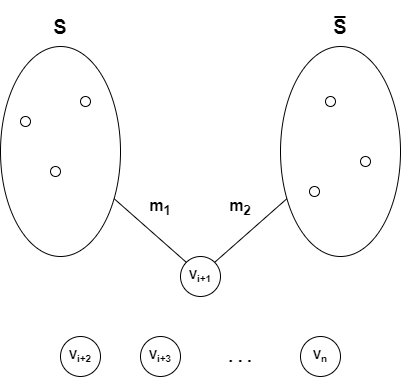

Let us denote with $k$ the actual size of the cut, with $m_1$ and $m_2$ the edges that connects $v_{i+1}$
 respectively, to the nodes in $S$ and $\bar{S}$, and with $L$ the edges involving $v_{i+2},\dots,v_{n}$. Let's consider the two expected cut-sizes:

\begin{equation}
 \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed and}\, v_{i+1}\, \in\, S]\, =\, k\,+\,m_{2}\,+\,\frac{L}{2}
\end{equation}

\begin{equation}
 \mathbb{E}[\text{cut-size}\, |\, v_{1},v_{2},\dots,v_{i}\, \text{are placed and}\, v_{i+1}\, \in\, \bar{S}]\, =\, k\,+\,m_{1}\,+\,\frac{L}{2}
\end{equation}

The two equations differs just by $m_1$ and $m_2$, therefore our greedy nodes selection strategy will be to compare $m_1$ and $m_2$ for every node $u\, \in\, V$ and put it in the set that maximize the current cut-size. In this way we obtain a polynomial time algorithm. As already mentioned before, the expected size of the computed cut will be at least $|E|/2$, which implies that every computed cut has a size greater or equal to that quantity. In conclusion the presented algorithm is a polynomial time 2-approximation for **MAX-CUT**. 

## Python code implementation



We will now see a python code implementation of the algorithms described in this lecture. First of lets start with the one that exactly solves **MAX-CUT** by enumerating all the possible cuts and then return the maximal cut-size.

In [10]:
def exact_solution(G):
    
    nodes = G.nodes()

    max_size = 0
    
    n = G.number_of_nodes()
    
    for i in range(n):
        subsets = it.combinations(nodes, i)
        
        for S in subsets:
            cut_size = nx.cut_size(G, S)
            if cut_size > max_size: max_size = cut_size
    
    return max_size

The following code implements the randomized 2-approximation.

In [9]:
def randomized_approximation(G):
    
    S = []
    
    n = G.number_of_nodes()
    
    for i in range(n):
        coin_flip = random.randint(0, 1)
        if coin_flip: S.append(i)
        
    cut_size = nx.cut_size(G, S)
    
    return cut_size

We can now test our implementation, for the sake of simplicity, on three graphs and check that on average the computed cut-size is half the value of the upper bound $|E|$, therefore at most half the value of $OPT$.

In [16]:
RUNS = 1000

def test_randomized_approximation(G):
    
    cut_size = 0
    
    for i in range(RUNS):
        cut_size += randomized_approximation(G)

    print("Upper bound: %i\nExact solution: %i\nAverage approximate solution: %i"%(G.number_of_edges(), exact_solution(G),math.ceil(cut_size/RUNS)))
            
G_1 = nx.gnp_random_graph(5, 0.50)
G_2 = nx.gnp_random_graph(10, 0.50)
G_3 = nx.gnp_random_graph(15, 0.50)

test_randomized_approximation(G_1)
test_randomized_approximation(G_2)
test_randomized_approximation(G_3)

Upper bound: 4
Exact solution: 4
Average approximate solution: 3
Upper bound: 26
Exact solution: 19
Average approximate solution: 14
Upper bound: 47
Exact solution: 33
Average approximate solution: 24


Using the *getPrime(m)* function directly copied from the lecture on *Universal hashing*, the following code implements the derandomization method based on universal hash functions, where we use the same three graphs to check that the computed cut-size is at least half the upper bound.

In [15]:
def getPrime( m ):   # naive method to find a prime in [m+1, 2m]
    def isPrime (x):
        for i in range(2, int(math.sqrt(x))):
            if x % i == 0:
                return False
        return True

    for p in range(m+1, 2*m+1):
        if isPrime(p):
            return p

def universal_hash_functions_derandomization(G):
    
    max_cut_size = 0

    n = G.number_of_nodes()
    
    k = math.ceil(math.log2(n))
    
    p = getPrime(2**k) # getPrime guarantees that p is theta(2^k)
    
    m = 2
    
    for a in range(1, p-1):
        for b in range(0, p-1):
            
            h = lambda u : ((a*u + b)%p)%m
    
            S = []
        
            for i in range(n):
                if h(i):
                    S.append(i)
            
            cut_size = nx.cut_size(G, S)
            
            if cut_size > max_cut_size:
                max_cut_size = cut_size
    
    return max_cut_size

print("Upper bound: %i Exact solution: %i Derandomized algorithm solution: %i"%(G_1.number_of_edges(), exact_solution(G_1), universal_hash_functions_derandomization(G_1)))
print("Upper bound: %i\nExact solution: %i\nDerandomized algorithm solution: %i"%(G_2.number_of_edges(), exact_solution(G_2), universal_hash_functions_derandomization(G_2)))
print("Upper bound: %i\nExact solution: %i\nDerandomized algorithm solution: %i"%(G_3.number_of_edges(), exact_solution(G_3), universal_hash_functions_derandomization(G_3)))

Upper bound: 7 Exact solution: 6 Derandomized algorithm solution: 6
Upper bound: 19
Exact solution: 15
Derandomized algorithm solution: 15
Upper bound: 51
Exact solution: 38
Derandomized algorithm solution: 33


This last piece of code implements the derandomization method based on conditional expectance. We also do the same test as before, to see if our implementation is correct and provides a 2-approximation.

In [14]:
def conditional_expectance_derandomization(G):
    
    S = [1]
    bar_S = []
    m1 = 0
    m2 = 0
    
    n = G.number_of_nodes()
    
    for i in range(2,n):
                
        for u in S:
            if G.has_edge(i, u):
                m1+=1
        
        for u in bar_S:
            if G.has_edge(i, u):
                m2+=1
        
        if m1 > m2 :
            bar_S.append(i)
        else:
            S.append(i)
        
    cut_size = nx.cut_size(G, S)
    
    return cut_size

print("Upper bound: %i\nExact solution: %i\nDerandomized algorithm solution: %i"%(G_1.number_of_edges(), exact_solution(G_1), conditional_expectance_derandomization(G_1)))
print("Upper bound: %i\nExact solution: %i\nDerandomized algorithm solution: %i"%(G_2.number_of_edges(), exact_solution(G_2), conditional_expectance_derandomization(G_2)))
print("Upper bound: %i\nExact solution: %i\nDerandomized algorithm solution: %i"%(G_3.number_of_edges(), exact_solution(G_3), conditional_expectance_derandomization(G_3)))

Upper bound: 7
Exact solution: 6
Derandomized algorithm solution: 6
Upper bound: 19
Exact solution: 15
Derandomized algorithm solution: 12
Upper bound: 51
Exact solution: 38
Derandomized algorithm solution: 30


## Comparison between the presented algorithms

Our implementations are correct, now we can try to look at which algorithms provide the solution with the better quality. For this purpose we can generate a set of randomly constructed graphs with an increasing number of nodes.